# Hierarchical Clustering — h_clustering_task

This notebook performs agglomerative hierarchical clustering on the Iris dataset using two selected features. It produces dendrograms for combinations of linkage methods (single, complete) and distance metrics (Euclidean, Cityblock). The notebook then selects one dendrogram, chooses a fixed number of clusters, runs clustering, and evaluates with silhouette score.


## 1. Load Iris and select two features
We'll use **petal length (petal_length)** and **sepal width (sepal_width)** for this exercise. We **do not** use the target (species) for clustering.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X_full = pd.DataFrame(iris.data, columns=iris.feature_names)
X = X_full[['petal length (cm)', 'sepal width (cm)']].copy()
X.columns = ['petal_length', 'sepal_width']
print('Selected features: ', list(X.columns))
display(X.head())

Selected features:  ['petal_length', 'sepal_width']


,petal_length,sepal_width
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2
3,1.5,3.1
4,1.4,3.6


## 2. Scale the data (StandardScaler)

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Data scaled.')

Data scaled.


## 3. Plot 4 dendrograms
We compute dendrograms for combinations of linkages and metrics.

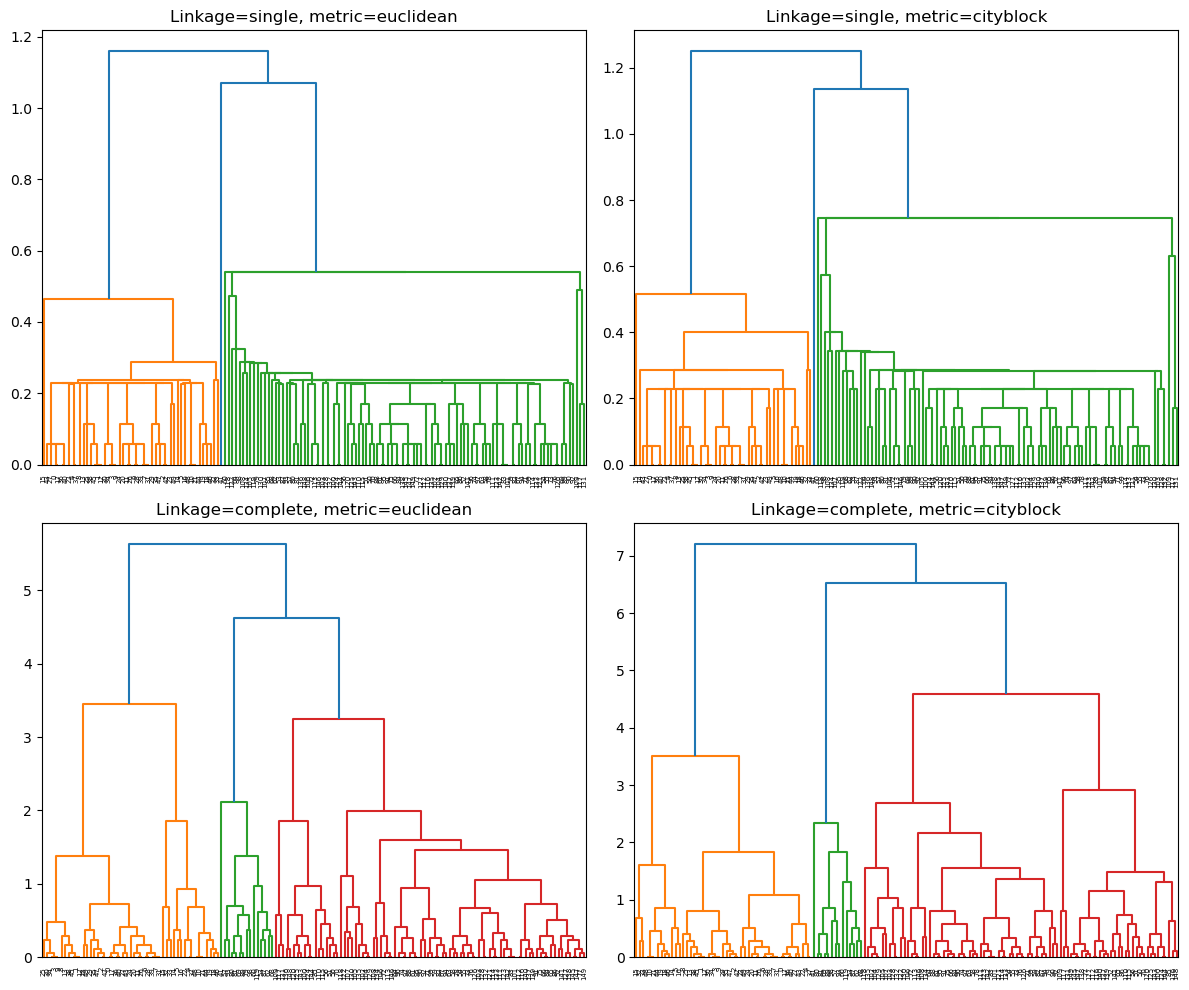

In [3]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

methods = ['single', 'complete']
metrics = ['euclidean', 'cityblock']

plt.figure(figsize=(12, 10))
plot_idx = 1
for m in methods:
    for metric in metrics:
        plt.subplot(2, 2, plot_idx)
        D = pdist(X_scaled, metric=metric)
        Z = sch.linkage(D, method=m)
        sch.dendrogram(Z)
        plt.title(f'Linkage={m}, metric={metric}')
        plot_idx += 1
plt.tight_layout()
plt.show()

## 4. Choose dendrogram and pick number of clusters
Proceeding with **complete linkage + euclidean** and selecting **k=3** clusters.

In [4]:
k=3
linkage_method='complete'
distance_metric='euclidean'
print(f'Chosen: linkage={linkage_method}, metric={distance_metric}, k={k}')

Chosen: linkage=complete, metric=euclidean, k=3


## 5. Run Agglomerative Clustering & silhouette score

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# compatibility for different sklearn versions
try:
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, metric=distance_metric)
except TypeError:
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, affinity=distance_metric)

labels = model.fit_predict(X_scaled)
sil = silhouette_score(X_scaled, labels)
print(f'Silhouette score for k={k}: {sil:.4f}')

import pandas as pd
result_df = X.copy()
result_df['cluster'] = labels
result_df.to_csv('h_clustering_task_clusters.csv', index=False)
print("Saved clusters to h_clustering_task_clusters.csv")

Silhouette score for k=3: 0.5062
Saved clusters to h_clustering_task_clusters.csv


## 6. Plot clusters

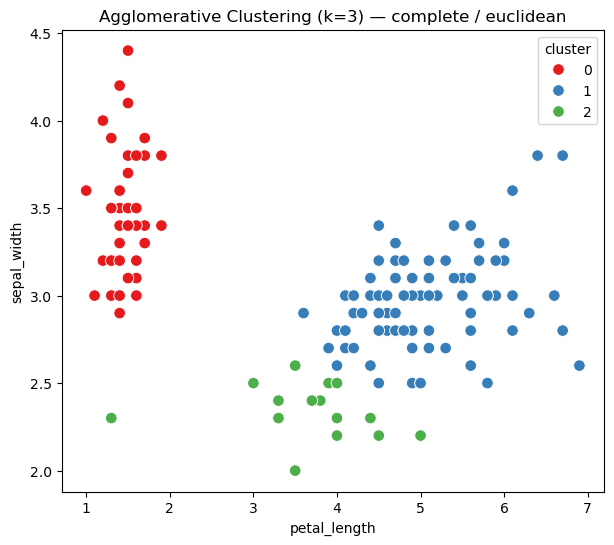

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
sns.scatterplot(data=result_df, x='petal_length', y='sepal_width', hue='cluster', palette='Set1', s=70)
plt.title(f'Agglomerative Clustering (k={k}) — {linkage_method} / {distance_metric}')
plt.show()

## 7. Quick silhouette check for k=2..6

In [7]:
scores = {}
for kk in range(2,7):
    try:
        m = AgglomerativeClustering(n_clusters=kk, linkage=linkage_method, metric=distance_metric)
    except TypeError:
        m = AgglomerativeClustering(n_clusters=kk, linkage=linkage_method, affinity=distance_metric)
    lbl = m.fit_predict(X_scaled)
    scores[kk] = silhouette_score(X_scaled, lbl)

print('Silhouette scores by k:')
for kk,s in scores.items():
    print(f' k={kk}: {s:.4f}')

Silhouette scores by k:
 k=2: 0.5917
 k=3: 0.5062
 k=4: 0.4784
 k=5: 0.4205
 k=6: 0.4057
